<h1><center> Machine Learning Model for Credit Card Fraud Detection </center> </h1>

<p> </p>
<p> </p>
    <p> </p>
        <p> </p>
            <p></p>
                <p></p>



# Contents

It contains only numerical input variables which are the result of a PCA transformation.Due to confidentiality issues, the dataset provider had not provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from pylab import rcParams
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve, auc
from sklearn.metrics import confusion_matrix
rcParams['figure.figsize'] = 12, 9

In [2]:
#Loading dataset...

df=pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
#Checking datatype so that we can confirm whether dataset has any categorical value or not .....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Checking null values....
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Preprocessing......

In [7]:
#Getting the description of features ...
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
#counting number of binary variables
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### Approach -1 by setting a threshold means anything less or greater than will be consider as outliers

In [9]:
#checking outliers using minimum quantile

min_threshold = df.Amount.quantile(0.0006)
min_threshold

0.0

In [10]:
df_amount = df[df.Amount<min_threshold]
df_amount.shape

(0, 31)

In [11]:
#checking outliers using max threshold

max_threshold = df.Amount.quantile(0.99828)

In [12]:
df_amount_max = df[df.Amount>max_threshold]

df_amount_max.shape

(490, 31)

In [13]:
df_amount_max.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
1388,1077.0,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,...,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
2178,1698.0,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,...,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,0
2453,2019.0,-3.687481,-8.746635,-2.057885,1.858936,-3.353004,1.580542,2.399114,-0.318630,-1.045750,...,1.230193,-1.573274,-2.122351,-0.141325,-0.838373,0.251148,-0.440547,0.445717,2540.42,0


In [14]:
#Coutning class variable in max quantile

df_amount_max.Class.value_counts()

0    490
Name: Class, dtype: int64

In [15]:
# see the quantile is not able to classify the exactly

<AxesSubplot:xlabel='Time', ylabel='Amount'>

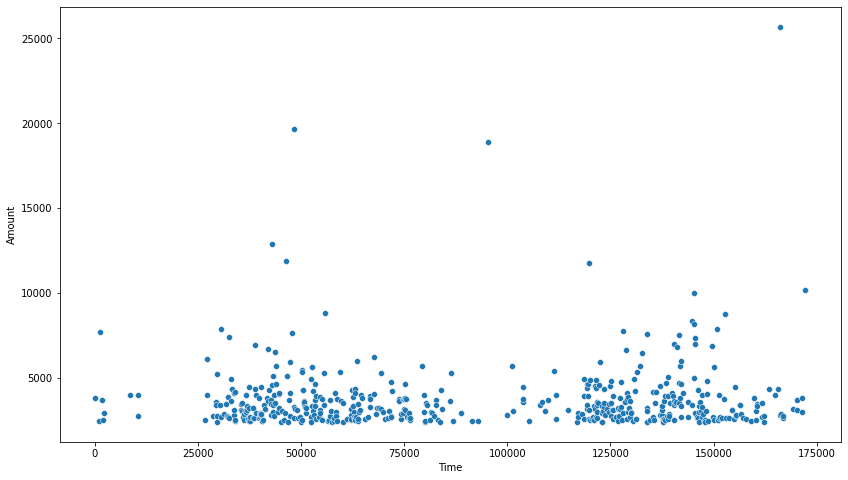

In [16]:
sns.scatterplot(x='Time',y='Amount',data=df_amount_max)

### Approach -2 Using Inter Quartile Range

In [17]:
amt_sort = sorted(df.Amount)

In [18]:
Q1 = np.percentile(amt_sort,25)
Q3 = np.percentile(amt_sort,75)
IQRs = Q3-Q1
IQRs

71.565

In [19]:
lower_range = Q1 - (1.5 * IQRs)
upper_range = Q3 + (1.5 * IQRs)

In [20]:
lower_range

-101.7475

In [21]:
upper_range

184.5125

In [22]:
outliers =  (df.Amount < lower_range) | (df.Amount > upper_range ) 
outliers

0         False
1         False
2          True
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806     True
Name: Amount, Length: 284807, dtype: bool

In [23]:
list = []
for i in outliers:
    if i is True:
        list.append(1)
    else:
        list.append(0)
print(list[1:100])        

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
df['New_class_with_IQR_methods'] = list 

In [25]:
df.New_class_with_IQR_methods.value_counts()

0    252903
1     31904
Name: New_class_with_IQR_methods, dtype: int64

<ul>  
    <li>You can observe that IQR is failed to produce promissing results as the newly data has predicted nearly 32k transactions as fraudulent however if we compare to the original dataset it is far away from the real scenario so this method is not helpful to go further </li>   </ul>

In [26]:
df.drop(['New_class_with_IQR_methods'],axis=1,inplace=True)

<p> See Percentile doesn't give promising results to identify outliers from original dataset</p>

In [27]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

### Approach -3 Using Box Plot

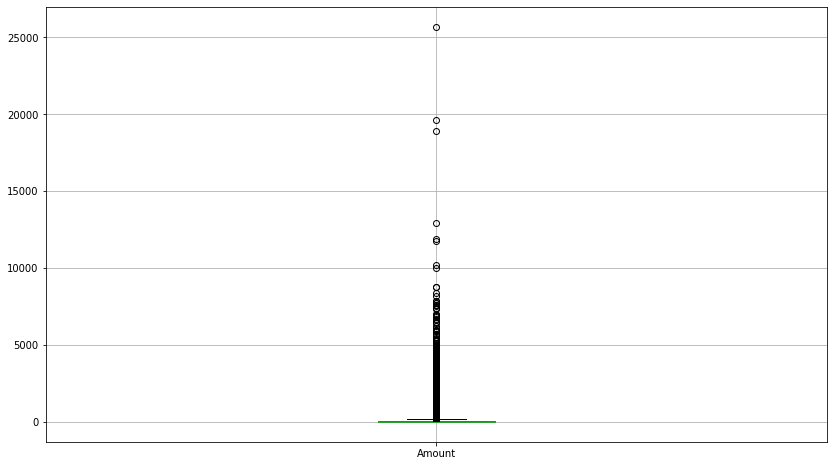

In [28]:
fig = df.boxplot(column='Amount')

In [29]:
#sns.boxplot(y='Time',x='Amount',hue='Class',data=df)

<AxesSubplot:>

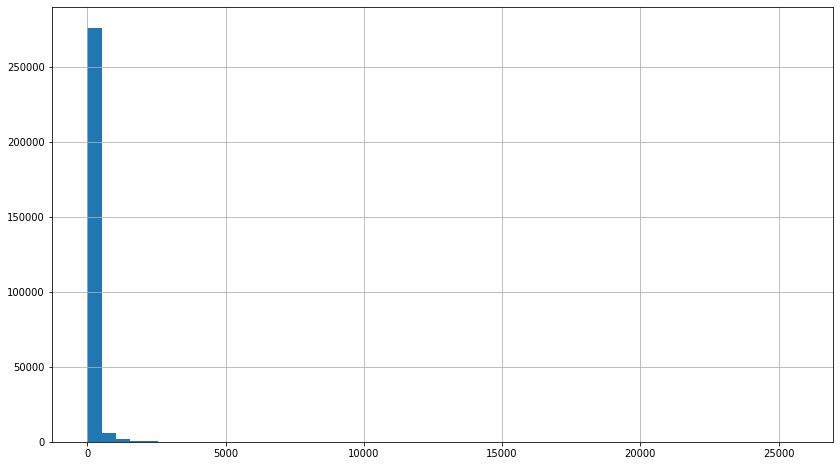

In [30]:
df['Amount'].hist(bins=50)

# Data visualization to get insight from the data

<AxesSubplot:ylabel='Frequency'>

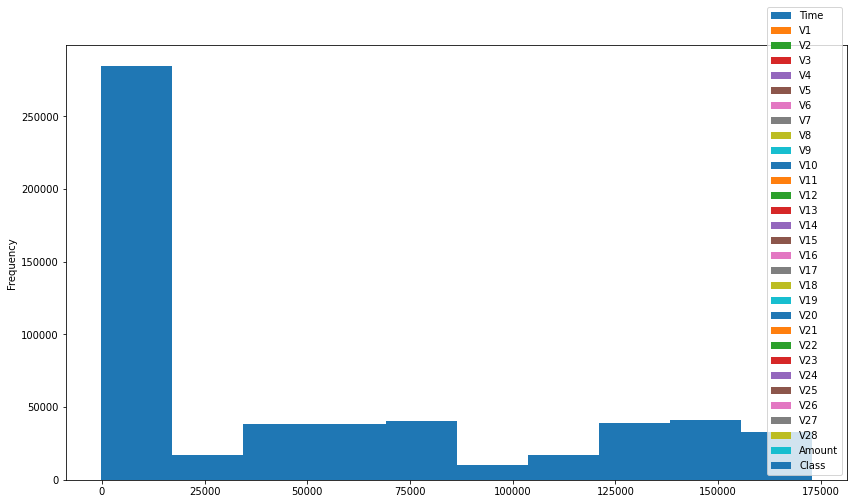

In [31]:
df.plot.hist(bins=10)

<p> from above plots it is clear that time has no correlations with amount and class </p>

<AxesSubplot:>

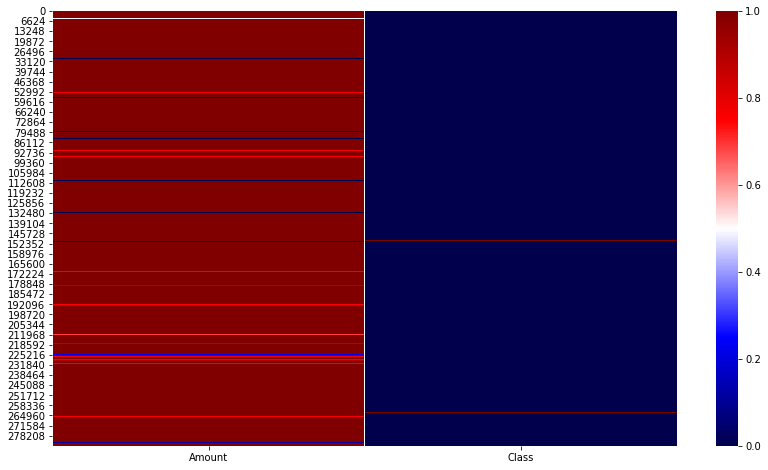

In [32]:
sns.heatmap(df[['Amount','Class']],vmin=0,vmax=1,cmap="seismic")

<p>See from above plot there are some transactions which are higly co-related but difficult to say that which amounts is actually fraudulent</p>

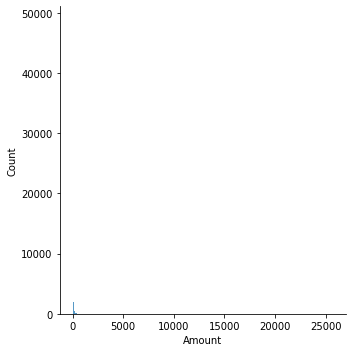

In [33]:
#Checking normal or gaussian distribution of amount
sns.displot(df['Amount'])

<AxesSubplot:>

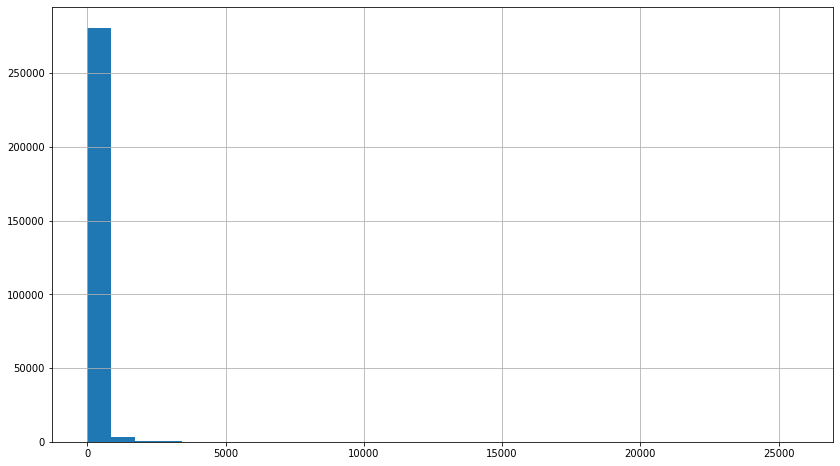

In [34]:
#Histogram plot of amount
df['Amount'].hist(bins=30)

Text(0.5, 1.0, 'Checking outliers using scatter plot')

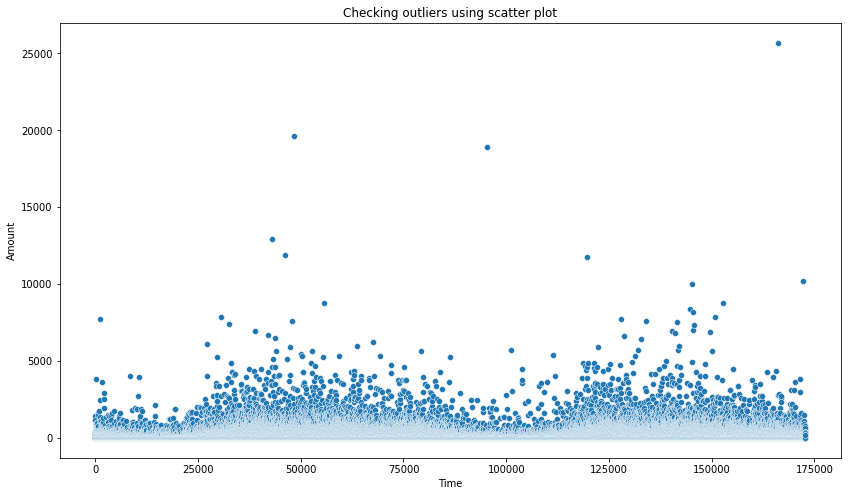

In [35]:
#checking outliers ......

sns.scatterplot(y = 'Amount',x = 'Time',data = df)
plt.title('Checking outliers using scatter plot')

In [36]:


fraud = df[df['Class'] == 1]

Not_fraud = df[df['Class'] == 0]

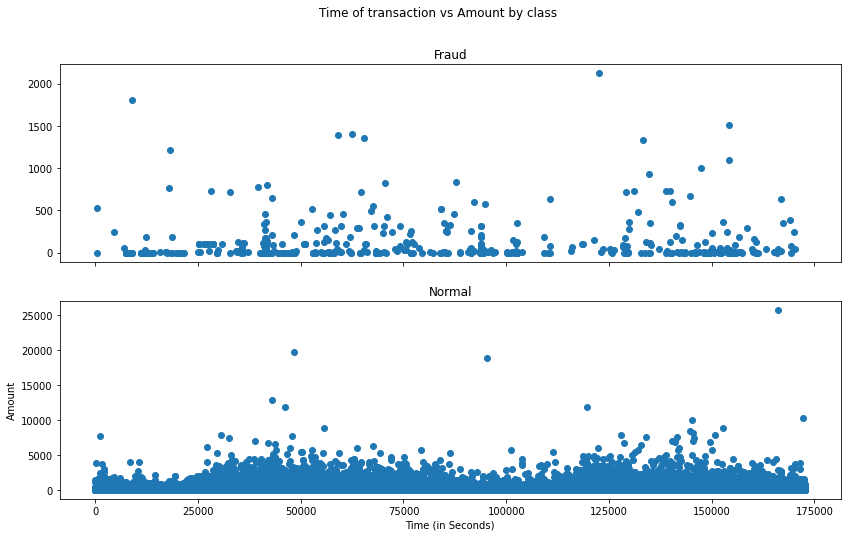

In [37]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Not_fraud.Time, Not_fraud.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Approach -4 Using Violin plot

<AxesSubplot:xlabel='Amount'>

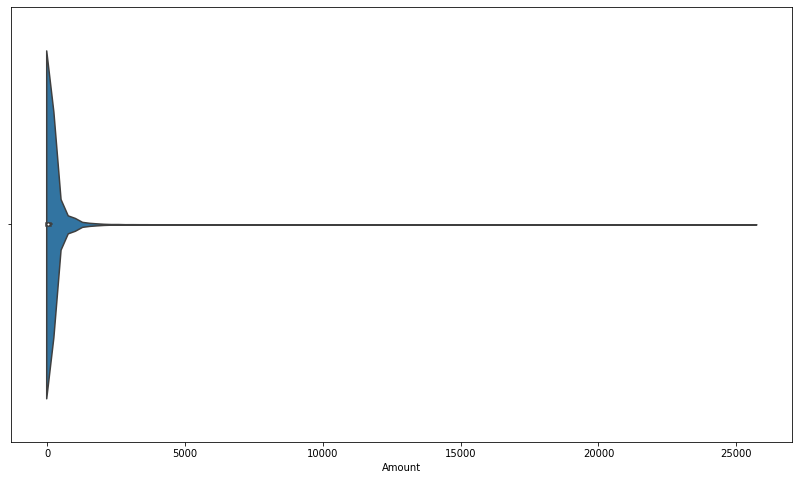

In [38]:
sns.violinplot(x=df['Amount'])

### Getting insights from statistics and visualization

In [39]:
#for visualization and description of features 
import sweetviz as sv
visuals_data=sv.analyze(df)
visuals_data.show_html('data visualisation.html')

                                             |          | [  0%]   00:00 -> (? left)

Report data visualisation.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Selecting Features for further process

<p> You can observe that no column is giving concrete evidence to select as the dataset is higly unbalanced so I have considered the whole </p> 

### Independent Variables


In [40]:
df_independent=df.iloc[:,:-1] 
df_independent.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Dependable Variables

In [41]:
#dependent varibale
df_dependent=df.iloc[:,-1]
df_dependent.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# Model Training ...

In [42]:
#Original dataset has been splitted for testing the model accuracy on new data which has not beep trained on
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_independent, df_dependent, test_size=0.25, random_state=42)

# Random Forest Classifier

In [43]:
#Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
#Initializing the constructor  or creating an object

model=RandomForestClassifier()

In [45]:
#Trainning..... the model

%time model.fit(X_train,y_train)

CPU times: user 3min 26s, sys: 670 ms, total: 3min 26s
Wall time: 3min 27s


RandomForestClassifier()

In [46]:
y_predict=model.predict(X_test)
print(y_predict)

[1 0 0 ... 0 0 0]


# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

%time log_model=LogisticRegression(max_iter=300)

CPU times: user 37 µs, sys: 20 µs, total: 57 µs
Wall time: 62 µs


In [48]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=300)

In [49]:
log_predict=log_model.predict(X_test)

# Unsupervised Learning Approach ......


## Isolation Forest

In [50]:
## Rnadomly taking only 10% of the original  data

df_sample= df.sample(frac = 0.1,random_state=1)

df_sample.shape

(28481, 31)

In [51]:
#Determine the number of fraud and valid transactions in the dataset

Fraud = df_sample[df_sample['Class']==1]

Valid = df_sample[df_sample['Class']==0]

outlier_fraction = len(Fraud)/float(len(Valid))



In [52]:
X_sample=df_sample.iloc[:,:30]

Y_sample=df_sample.iloc[:,-1]

In [53]:
print('Outlier fraction : {} '.format(outlier_fraction))

print("Fraud Cases in sample: {}".format(len(Fraud)))

print("Valid Cases in sample: {}".format(len(Valid)))

Outlier fraction : 0.0017234102419808666 
Fraud Cases in sample: 49
Valid Cases in sample: 28432


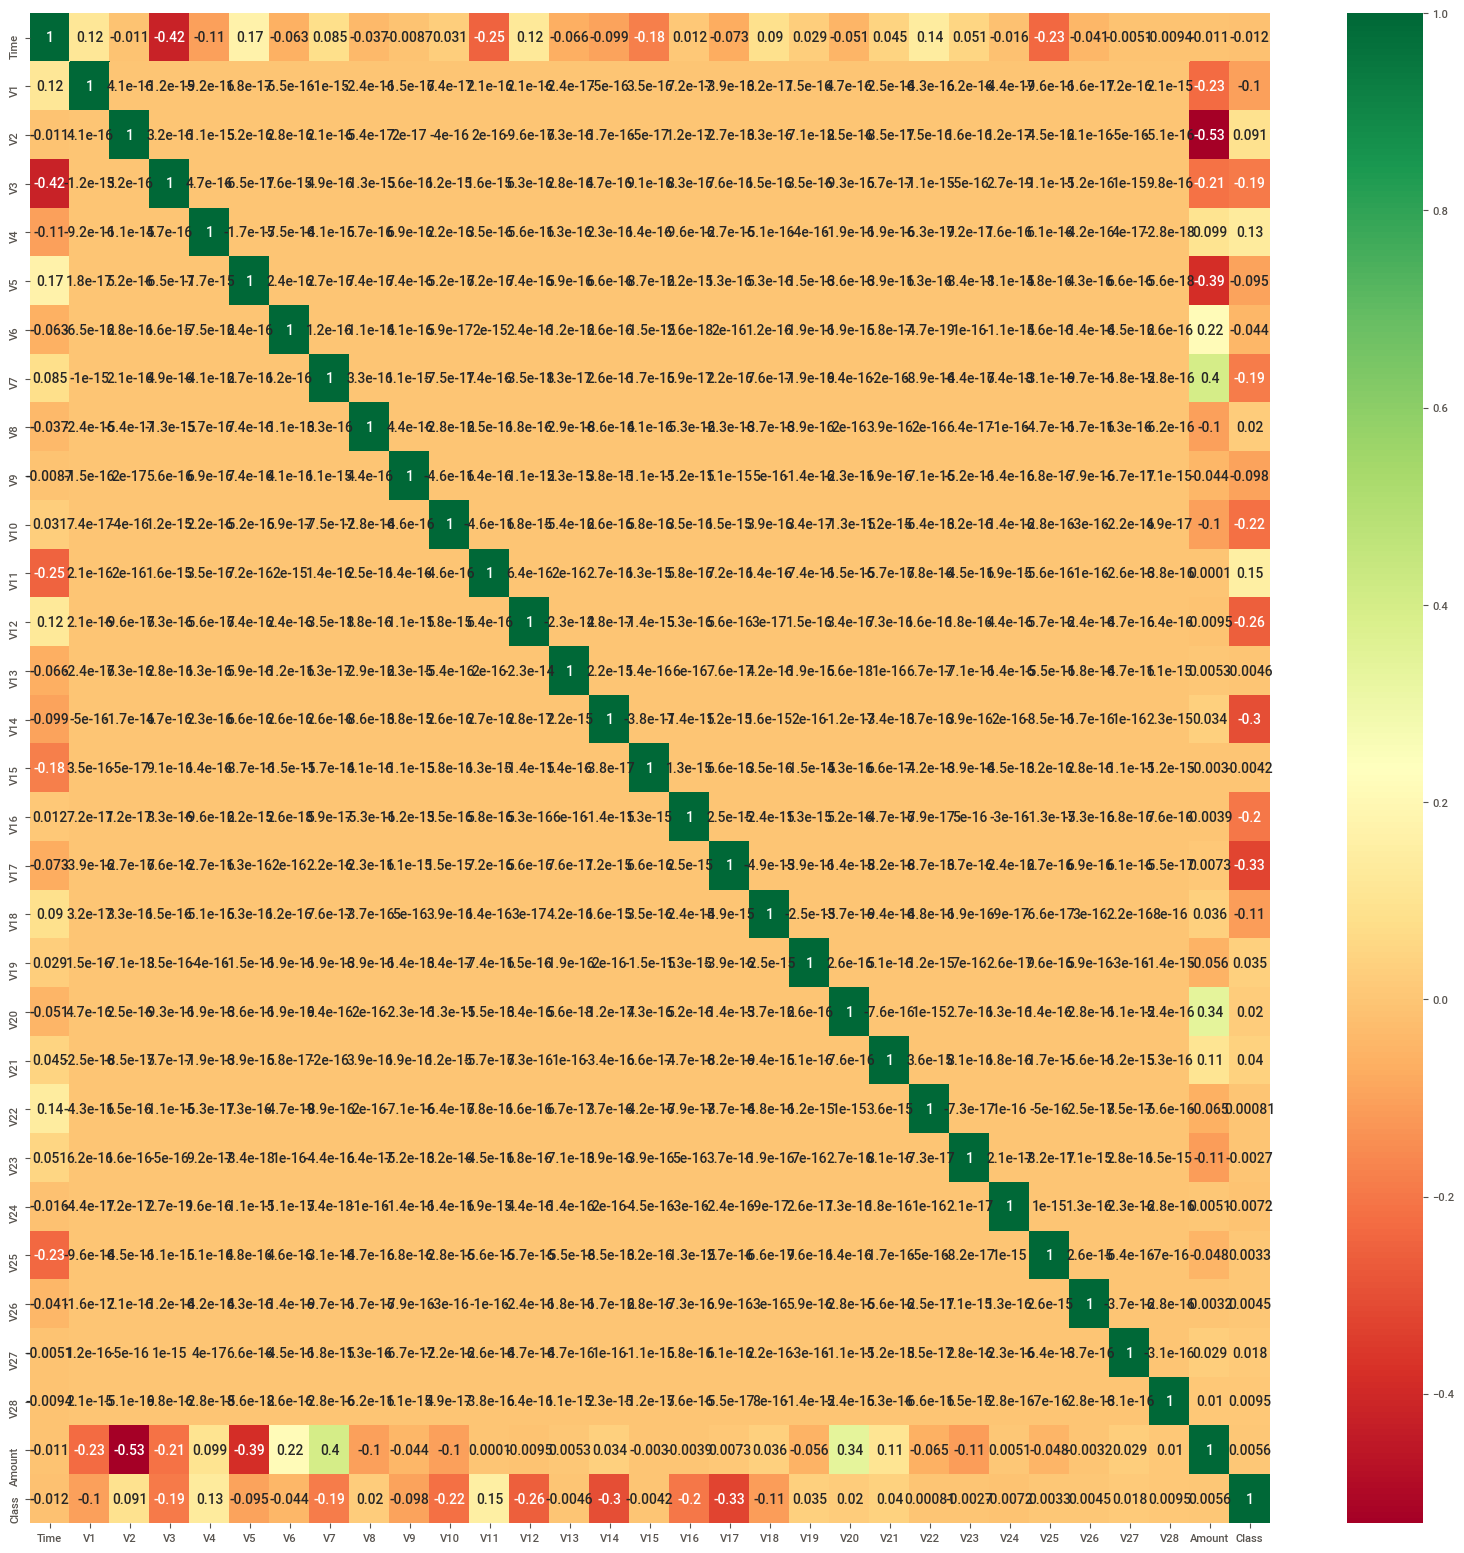

In [54]:
## Correlation
#get correlations of each features in dataset
corrmat = df_sample.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [55]:
iso_model=IsolationForest(n_estimators=100, max_samples=len(X_sample), 
                                       contamination=outlier_fraction,random_state=np.random.RandomState(42), verbose=0)

In [56]:
iso_model.fit(X_sample)

IsolationForest(contamination=0.0017234102419808666, max_samples=28481,
                random_state=RandomState(MT19937) at 0x7FD06AFDFC40)

In [57]:
scores_prediction = iso_model.decision_function(X_sample)
y_pred = iso_model.predict(X_sample)

In [58]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
no_errors = (y_pred != Y_sample).sum()

In [59]:
fraudulent = []
normal = []
for i in y_pred:
    if i == 1:
        fraudulent.append(i)
    else:
        normal.append(i)
print('Faudulent cases predicted by the model : ',len(fraudulent))
print('Normal cases predicted by the model : ',len(normal))

Faudulent cases predicted by the model :  50
Normal cases predicted by the model :  28431


As you can see our original data has 49 fraudulent cases and our model has predicted 50 cases so we
can happily go with this model

## Local Outlier Factor

In [60]:
# Choosing the right value of 'K' in LOF

accuracy_list = []
for i in range(2,25):

    lof_model = LocalOutlierFactor(n_neighbors=i)

    pred = lof_model.fit_predict(X_sample)

    scores_prediction = lof_model.negative_outlier_factor_
    
    pred[pred == 1] = 0
    pred[pred == -1] = 1
    n_errors = (pred != Y_sample).sum()
    accuracy_list.append(accuracy_score(Y_sample,pred)*100)
print(accuracy_list)    

[87.20550542466908, 90.41466240651663, 91.6997296443243, 92.37386327727258, 92.36684105192936, 92.272041009796, 91.87879639057618, 91.74537410905515, 91.44692953196868, 90.99399599733155, 90.31284013904006, 89.88799550577578, 89.50879533724238, 89.29110635160282, 89.06639514062006, 88.82061725360767, 88.7152838734595, 88.62750605666936, 88.5853727046101, 88.5853727046101, 88.5923949299533, 88.68719497208666, 88.80657280292125]


Text(0.5, 1.0, 'Choosing the right value of k')

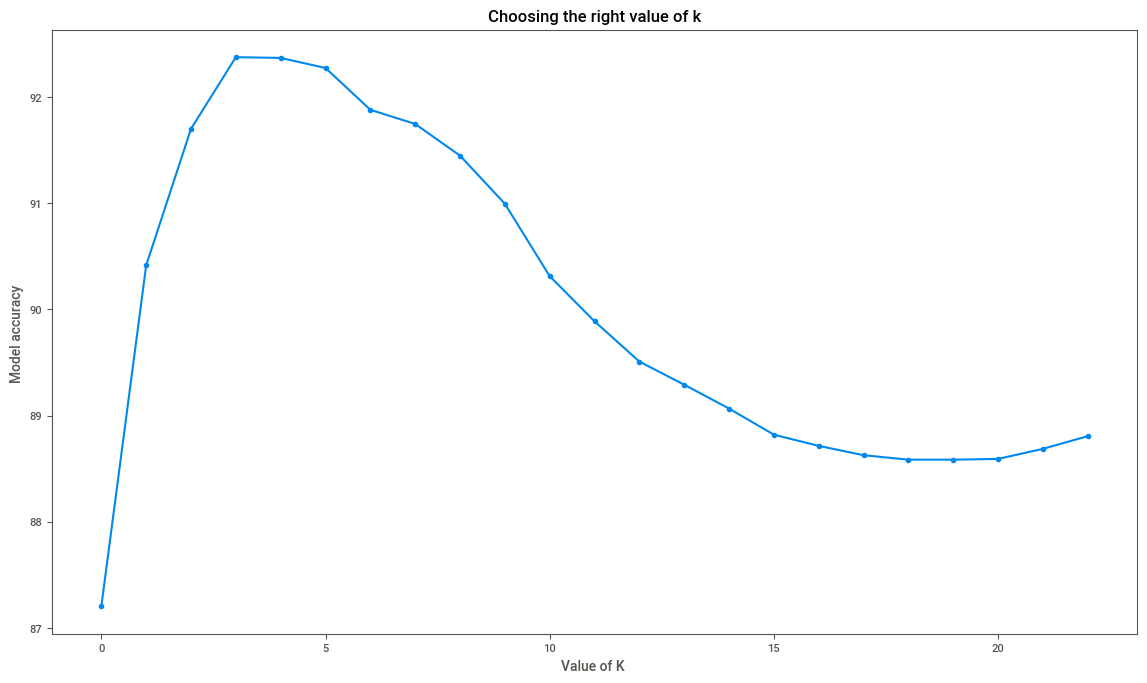

In [61]:
plt.plot(accuracy_list ,marker = 'o')
plt.xlabel('Value of K ')
plt.ylabel('Model accuracy ')
plt.title('Choosing the right value of k')

In [62]:
### You can observe that model perform better when value of K is 5 so we will train on that

In [63]:
lof_model = LocalOutlierFactor(n_neighbors=5)
pred = lof_model.fit_predict(X_sample)
scores_prediction = lof_model.negative_outlier_factor_
    
pred[pred == 1] = 0
pred[pred == -1] = 1
n_errors = (pred != Y_sample).sum()

In [64]:
frauds = []
normals = []
for i in pred:
    if i == 1:
        frauds.append(i)
    else:
        normals.append(i)
print('Faudulent cases predicted by the LOF model : ',len(frauds))
print('Normal cases predicted by the LOF model : ',len(normals))

Faudulent cases predicted by the LOF model :  2139
Normal cases predicted by the LOF model :  26342


In [65]:
print('=='*6 + ' Model Performance Evaluation ' + '=='*6)
print()
# Classification Metrics for Isolation

print("Isolation Forest errors : {}".format(no_errors))
print("Accuracy Score : {0:2f} %".format(accuracy_score(Y_sample,y_pred)*100))
print()
print('Classificstion report for Isolation Forest')
print('--'*27)
print(classification_report(Y_sample,y_pred))
print('--'*27)


# Classification Metrics for LOF
print()
print("Local Outlier factor errors: {}".format(n_errors))
print("Accuracy Score : {0:2f} %".format(accuracy_score(Y_sample,pred)*100))
print()
print('Classification report for Local outlier factor')
print('--'*27)
print(classification_report(Y_sample,pred))

============ Model Performance Evaluation ============

Isolation Forest errors : 77
Accuracy Score : 99.729644 %

Classificstion report for Isolation Forest
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.22      0.22      0.22        49

    accuracy                           1.00     28481
   macro avg       0.61      0.61      0.61     28481
weighted avg       1.00      1.00      1.00     28481

------------------------------------------------------

Local Outlier factor errors: 2172
Accuracy Score : 92.373863 %

Classification report for Local outlier factor
------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     28432
           1       0.00      0.16      0.01        49

    accuracy                           0.92     28481
   macro avg       0

# Model Performance Evaluation ....

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
#checking the model performance on test dataset for Random Forest Classifier
tn=confusion_matrix(y_test,y_predict)
print('True positive: ',tn[0][0])
print('False Positive: ',tn[0][1])
print('False negative: ',tn[1][0])
print('True Negative: ',tn[1][1])

True positive:  71082
False Positive:  7
False negative:  23
True Negative:  90


In [68]:
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_auc_score

#Checking the model accuracy..
print('Accuracy in RandomForest : {:2f} %'.format(accuracy_score(y_test,y_predict)*100))


#ROC and AUC Curve to determine the accuracy of the model
print('Roc score : ',roc_auc_score(y_test,y_predict))

Accuracy in RandomForest : 99.957866 %
Roc score :  0.89818085443686


In [69]:
from sklearn.metrics import roc_curve, auc

#ROC Curve for Random Forest Classsifier

y_pred_prob1 = model.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

In [70]:
#checking the model performance on test dataset for Logistic Regression

tn=confusion_matrix(y_test,log_predict)
print('True positive: ',tn[0][0])
print('False Positive: ',tn[0][1])
print('False negative: ',tn[1][0])
print('True Negative: ',tn[1][1])

True positive:  71057
False Positive:  32
False negative:  52
True Negative:  61


In [71]:
#Checking the model accuracy..

print('Accuracy in Logistics Regression : {0:2f} %'.format(accuracy_score(y_test,log_predict)*100))
print('ROC and AUC Score : ',roc_auc_score(y_test,log_predict))

Accuracy in Logistics Regression : 99.882026 %
ROC and AUC Score :  0.7696864344420811


In [72]:
#ROC curve for Logistic Regresssion

y_pred_prob2 = log_model.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

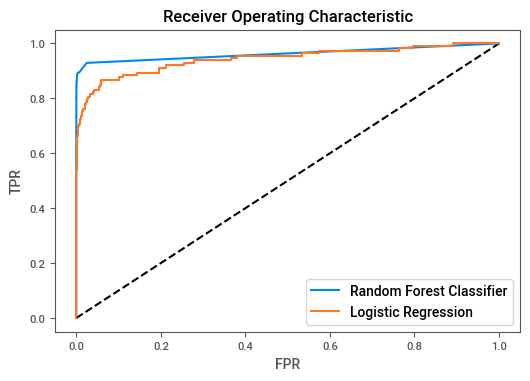

In [73]:
#ROC Plot for different models
rcParams['figure.figsize'] = 6, 4
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Random Forest Classifier")
plt.plot(fpr2, tpr2, label= "Logistic Regression")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# Observations

<ul><li>From above intrepretation we can  say that RandomForestClassifier has given the best accuracy when it comes to classify the transactions however computationally it is very expensive as compare to Logistic Regression you can observe that RandomForestClasiffier took more than 3 mins while Logistics regression takes only 32 micros seconds to train the model </li>
<li>Isolation Forest detected 77 errors versus Local Outlier Factor detecting 2172 errors  ( <b>Note : </b>This evaluations are based only on 10% of the original dataset although you can take the whole ) </li>
<li>Isolation Forest has a 99.74% more accurate than LOF of 92.37% When comparing error precision & recall for both models , the Isolation Forest performed much better than the LOF as we can see that the detection of fraud cases is around 27 % versus LOF detection rate of just 2 % So overall Isolation Forest Method performed much better in determining the fraud cases which is around 30%.</li>
<li>We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases</li></ul>